In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df  = pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [6]:
df.shape

(20, 3)

In [7]:
#scaling using sklearn

from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
w = np.ones(shape=2)
w

array([1., 1.])

In [10]:
scaled_x.T #transpose of scaled_x

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [11]:
a = np.array([2, 3, 4])
b = np.array([10, 23, 6])
np.mean(np.square(a-b))

156.0

In [12]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1] #
    w = np.ones(shape = (number_of_features)) #initialize w1, w2
    bias = 0
    total_sample = X.shape[0]
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, X.T) + bias # w1*are + w2 *bedrooms + bias
        
        w_grad = -(2/total_sample)*(X.T.dot(y_true - y_predicted))
        w_grad = -(2/total_sample)*(np.sum(y_true - y_predicted))
        
        w =  w - learning_rate*w_grad
        bias = bias - learning_rate*w_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        #let's record the cost after 10 iter for plotting
        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
        
    return w, bias, cost, cost_list, epochs_list

w, b, cost, cost_list, epochs_list =  batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost   #scaled_y.reshape(scaled_y.shape[0],) =  scaled_y.T[0]

(array([0.73721824, 0.73721824]), -0.2627817578833422, 0.009601182127215635)

In [13]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [14]:
scaled_y.T[0].shape

(20,)

In [15]:
scaled_y.reshape(scaled_y.shape[0],) =  scaled_y.T[0]

SyntaxError: cannot assign to function call (Temp/ipykernel_16836/1004002109.py, line 1)

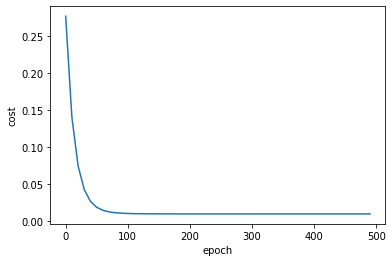

In [16]:
#plotting
# looking at the curve we can say that our w, bias, cost are optimal values
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epochs_list, cost_list)

In [17]:
sx.transform([[2600, 4]])

D:\Users\apytl\AppData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [18]:
sy.inverse_transform([[1, 0]]) # in this scale 1= max value ie 167, 0 scaled to min ie 32

array([[167.,  32.]])

In [19]:
#we can threfore wirte a prediction fucntion

def predict(area, bedrooms, w, b):
    #scaling
    scaled_x = sx.transform([[area, bedrooms]])[0] #transform expect 2d array
    scaled_price = w[0] * scaled_x[0] + w[1] * scaled_x[1] + b
    
    #to get the original values from our dataset we need to reverse transform due to the scaling method we use.
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)
    

D:\Users\apytl\AppData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


132.9416141256975

In [20]:
predict(3300, 4, w, b)

D:\Users\apytl\AppData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


156.96476029122303

In [21]:
import random
random.randint(0, 6)

3

In [22]:

def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    
    number_of_features = X.shape[1] #
    w = np.ones(shape = (number_of_features)) #initialize w1, w2
    bias = 0
    total_sample = X.shape[0]
    
    cost_list = []
    epochs_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_sample -1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + bias # w1*are + w2 *bedrooms + bias
        
        w_grad = -(2/total_sample)*(sample_x.T.dot(sample_y - y_predicted))
        w_grad = -(2/total_sample)*(np.sum(sample_y - y_predicted))
        
        w =  w - learning_rate*w_grad
        bias = bias - learning_rate*w_grad
        
        cost = np.mean(np.square(sample_y - y_predicted))
        
        #let's record the cost after 10 iter for plotting
        if i%100==0:
            cost_list.append(cost)
            epochs_list.append(i)
        
    return w, bias, cost, cost_list, epochs_list
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epochs_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 10000)

w_sgd, b_sgd, cost_sgd,

(array([0.73787573, 0.73787573]), -0.2621242659037279, 0.008052777151407833)

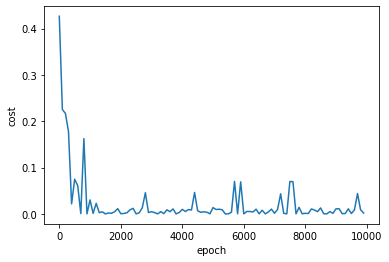

In [23]:
#plotting
# looking at the curve we can say that our w, bias, cost are optimal values
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epochs_list_sgd, cost_list_sgd)

In [24]:
predict(2600, 4, w_sgd, b_sgd)

D:\Users\apytl\AppData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


133.15203989934602

In [25]:
#Mini batch

def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) # array([1., 1.])
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.70995059, 0.67814885]), -0.2334294138609877, 0.0033673740905988056)

In [26]:
import numpy as np
random_indices = np.random.permutation(5)
random_indices

array([4, 0, 2, 3, 1])

In [27]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [36]:
scaled_x.shape

(20, 2)

In [37]:
for j in range(0, 20, 5):
    print (j)
    

0
5
10
15


In [39]:
for j in range(0, 20, 5):
    print (scaled_x[j:j+5])

[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]]
[[0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]]
[[0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]]
[[0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]


In [45]:
scaled_x.T.shape

(2, 20)

In [52]:
a = [1,2,3,4,5,6]

a = np.array(a)
a[[1, 2]]

array([2, 3])